In [ ]:
import zipfile
from PIL import Image
import cv2
import re
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D,BatchNormalization
import matplotlib.pyplot as plt
import librosa
from PIL import Image
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , LeakyReLU
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.regularizers import L1
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!kaggle datasets download -d amirebrahimi66/large-dataset-of-persian-license-plate-characters

Dataset URL: https://www.kaggle.com/datasets/amirebrahimi66/large-dataset-of-persian-license-plate-characters
License(s): copyright-authors
 60% 17.0M/28.5M [00:00<00:00, 63.7MB/s]
100% 28.5M/28.5M [00:00<00:00, 83.8MB/s]


In [ ]:
with zipfile.ZipFile('large-dataset-of-persian-license-plate-characters.zip','r') as alpha:
  alpha.extractall('persian-alpha')

In [ ]:
import os
a = os.listdir('/content/persian-alpha/chars')

In [ ]:
len(a)

24

In [ ]:
X=[]
y=[]
for i in a:
  addres= os.listdir('/content/persian-alpha/chars/'+i+'/2/')
  for j in addres:
    if(j=='Thumbs.db'):
      continue
    else:
      temp = Image.open('/content/persian-alpha/chars/'+i+'/2/'+j).convert('L')
      temp = temp.resize((128,128))
      temp = np.array(temp)
      X.append(temp)
      print(i)
      if (i=='A'):
        y.append(10)
      elif(i=='B'):
        y.append(11)
      elif(i=='C'):
        y.append(12)
      elif(i=='D'):
        y.append(13)
      elif(i=='E'):
        y.append(14)
      elif(i=='G'):
        y.append(15)
      elif(i=='H'):
        y.append(16)
      elif(i=='J'):
        y.append(17)
      elif(i=='L'):
        y.append(18)
      elif(i=='M'):
        y.append(19)
      elif(i=='N'):
        y.append(20)
      elif(i=='S'):
        y.append(21)
      elif(i=='T'):
        y.append(22)
      elif(i=='V'):
        y.append(23)
      elif(i=='Y'):
        y.append(24)
      else:
        y.append(int(i))

In [ ]:
image = np.asarray(X)
label = np.asarray(y)

label = label - 1

label = keras.utils.to_categorical(label,num_classes=24)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(image,label,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)

(16116, 128, 128) (16116, 24)


In [ ]:
model = keras.Sequential()
model.add(Dropout(0.12))
model.add(BatchNormalization())


model.add(Flatten(input_shape=(64,64)))
model.add(BatchNormalization())

model.add(Dense(256,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))


model.add(Dense(24,activation='softmax'))
from tensorflow.keras.optimizers import Adam
from keras import optimizers
opt = optimizers.Adam(learning_rate=0.0001)
early_sttoping= EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test),callbacks=early_sttoping)

Epoch 1/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - acc: 0.8662 - loss: 0.5074 - val_acc: 0.9968 - val_loss: 0.0116
Epoch 2/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9979 - loss: 0.0097 - val_acc: 0.9965 - val_loss: 0.0081
Epoch 3/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9959 - loss: 0.0132 - val_acc: 0.9965 - val_loss: 0.0085
Epoch 4/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9965 - loss: 0.0108 - val_acc: 0.9988 - val_loss: 0.0040
Epoch 5/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9997 - loss: 0.0017 - val_acc: 0.9985 - val_loss: 0.0032
Epoch 6/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9993 - loss: 0.0025 - val_acc: 0.9990 - val_loss: 0.0026
Epoch 7/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9981 - loss: 0.0082 - val_acc: 0.9990 - val_loss: 0.0018
Epoch 8/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 1.0000 - loss: 6.6502e-04 - val_acc: 0.9978 - val_loss: 0.0068
Epoch 9/100
504/504 ━━━━━━━━━━━━━━━━━━━━ 2

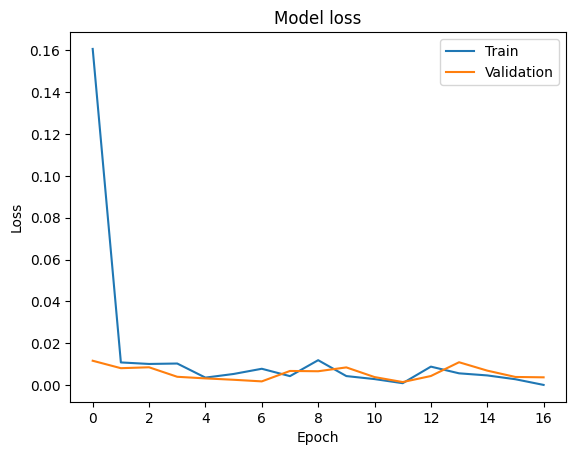

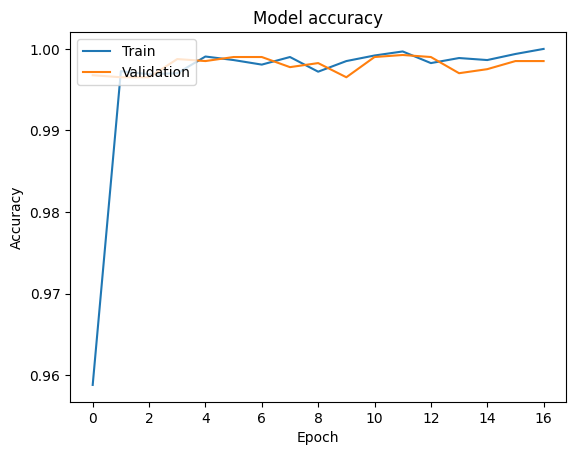

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the loss and accuracy
plot_loss(history)
plot_accuracy(history)


In [ ]:
model.save('alefba.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
model= load_model('/content/drive/MyDrive/plate/alefba_model2.h5')

array([[190, 190, 190, ..., 183, 183, 183],
       [190, 190, 190, ..., 183, 183, 183],
       [190, 190, 190, ..., 183, 183, 183],
       ...,
       [132, 132, 132, ..., 171, 171, 171],
       [132, 132, 132, ..., 171, 171, 171],
       [132, 132, 132, ..., 171, 171, 171]], dtype=uint8)
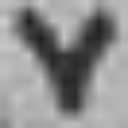

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/2.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128, 128))
img_reshaped = img.reshape((1, 128, 128, 1))
img

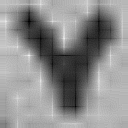

In [ ]:
import numpy as np
sharpen_kernel = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])

sharpened_img = cv2.filter2D(img, -1, sharpen_kernel)
cv2_imshow(sharpened_img)

In [ ]:
reshape = sharpened_img.reshape((1, 128, 128, 1))
answers= model.predict(reshape)
ans= np.argmax(answers)
ans +=1
alpha= ['','1','2','3','4','5','6','7','8','9','الف','ب','س','د','ع','ق','ه','ح','ل','م','ن','ص','ط','و','ی']

print(alpha[ans])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
7
